In [ ]:
from ipynb.fs.full.converter import main_df
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates


In [16]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [17]:
chosen_category = "AgeCategory"
numerical_columns = main_df.describe().columns.to_list()
numerical_columns.append(chosen_category)
print(numerical_columns)

['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime', 'AgeCategory']


In [ ]:
main_df.describe(include="object")

In [18]:
numerical_df = main_df[numerical_columns]
numerical_df_sample = numerical_df.sample(frac=0.01)

<function matplotlib.pyplot.show(close=None, block=None)>

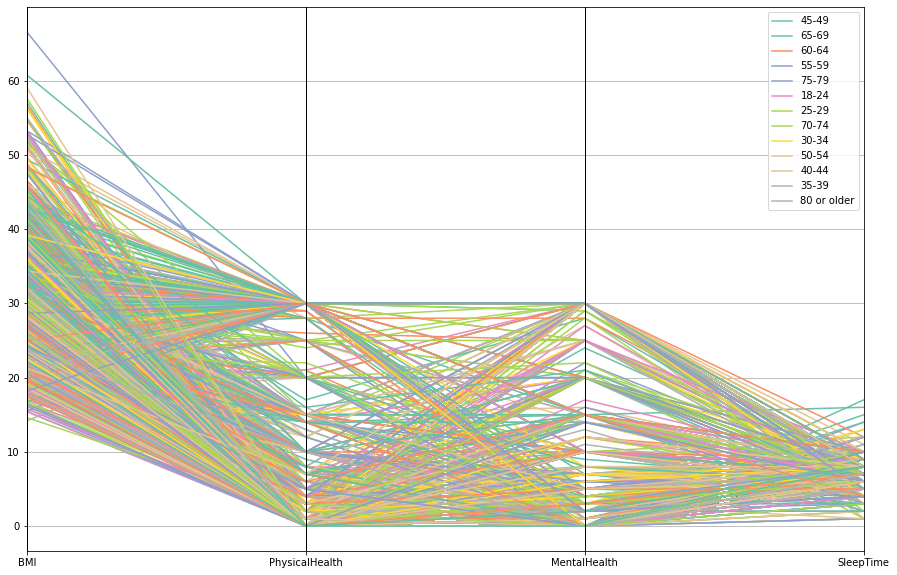

In [19]:
plt.figure(figsize=(15, 10))
parallel_coordinates(numerical_df_sample, chosen_category, colormap=plt.get_cmap("Set2"))
plt.show